[0.2181 0.2991 0.2338 0.249 ]
[372.68887416 399.67686297 343.66787234 358.64340292] [-110.54767164 -213.85183837  -61.28091453  -62.8905004 ]


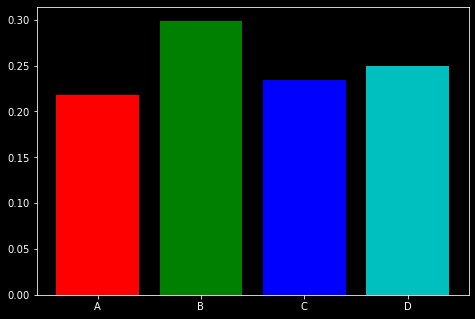

In [346]:
import numpy as np
from matplotlib import pyplot as plt
# parameters
S = 100
T = 100
alpha  = 0.4
eps = 0.4
gamma = 0.8
k_plus = 0.9
k_minus = 0.1

def choose_action (Q_plus, Q_minus, eps):
    summ = (np.array(Q_plus) + np.array(Q_minus))/2
    diff = (np.array(Q_plus) - np.array(Q_minus))
    U = summ + np.random.uniform(-0.5,0.5)*diff
    # print(U)
    if np.random.uniform(0,1) < eps:
        action = np.random.randint(0,4)
    else:
        action = np.argmax(U[:])
    return action

# updates the Q-values
def update (curr_action, curr_state, Q, next_action, next_state, r,k,Q_type):
    predict = Q[curr_state, curr_action]
    target = r + gamma*Q[next_state, next_action]
    Q[curr_state, curr_action] = Q[curr_state, curr_action] + alpha*piecewise(target - predict, k, Q_type) 
    
        
# for simplicity, Q_type is a string character indicating which Q we are updating
# Q_type = 'POS' or 'NEG'
def piecewise(TD_error, k, Q_type):
    if Q_type == 'POS':
        if TD_error >= 0:
            return (1+k)*TD_error
        else:
            return (1-k)*TD_error
    elif TD_error >= 0:
        return (1-k)*TD_error
    else:
        return (1+k)*TD_error

# function to encode the IGT structure - transition and reward
# return reward, next_state
def step(curr_state, curr_action):
    next_state = curr_state
    # actions {0,1,2,3} correspond to decks {A,B,C,D}
    if curr_action == 0:
        reward = np.random.choice([100,-150])
    elif curr_action == 1:
        if np.random.uniform(0,1) < 0.1:
            reward = -1150
        else:
            reward = 100
    elif curr_action == 2:
        reward = np.random.choice([0,50])
    else:
        if np.random.uniform(0,1) < 0.1:
            reward = -200
        else:
            reward = 50
    return reward, next_state

#---------------Start Training Here-----------------------
Total_plus = np.zeros((S,4))
Total_minus = np.zeros((S,4))
Deck_choice = np.zeros((4,))
for s in range(S):
    curr_state = 0
    Q_plus = np.zeros((1,4))
    Q_minus = np.zeros((1,4))
    
    for t in range(T):
        
        # select first action 
        curr_action = choose_action(Q_plus, Q_minus, eps)
        reward, next_state = step(curr_state, curr_action)
        # record the deck that was chosen
        Deck_choice[curr_action]+=1
        # select the "look-up" action as per SARSA
        next_action = choose_action(Q_plus, Q_minus, eps)
        
        # update the Q-values
        update(curr_action, curr_state,Q_plus, next_action, next_state, reward , k_plus, "POS")
        update(curr_action, curr_state, Q_minus, next_action, next_state, reward, k_minus, "NEG")
        
        curr_action = next_action
        curr_state = next_state
    
    Total_plus[s,:] = Q_plus
    Total_minus[s,:] = Q_minus
Deck_choice /=(S*T)
print(Deck_choice)
print(np.mean(Total_plus, axis = 0), np.mean(Total_minus, axis = 0))

plt.style.use(['dark_background'])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
decks = np.array(['A', 'B', 'C', 'D'])

ax.bar(decks, Deck_choice, color = ['r', 'g', 'b', 'c'])
plt.show()

-3.3000000000000003
2
0
100 3
